In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
data = pd.read_csv('../input/chess/games.csv')

In [12]:
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


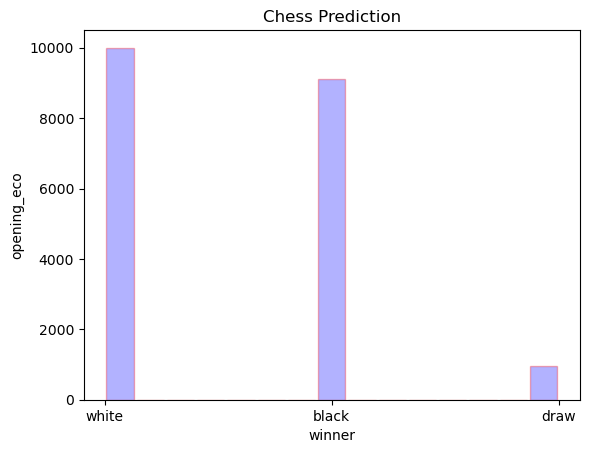

In [9]:
plt.hist(data['winner'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('winner') 
plt.ylabel('opening_eco') 

#plot title 
plt.title('Chess Prediction') 
plt.show();

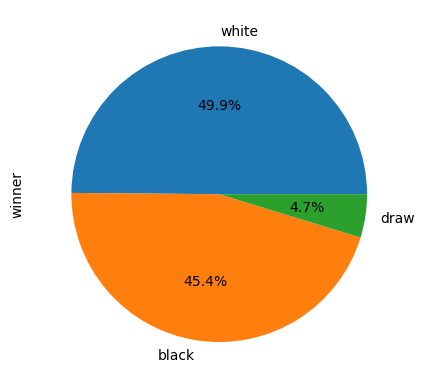

In [13]:
data['winner'].value_counts().head(10).plot.pie(autopct='%.1f%%')
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [5]:
data['winner'].unique() # finding unique labels

array(['white', 'black', 'draw'], dtype=object)

In [6]:
data.query("winner != 'draw'") # removing draw labels, only white and black remain

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [7]:
moves = np.array(data.query("winner != 'draw'")['moves'])  # get moves of matches where white or black won 

In [8]:
moves

array(['d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4',
       'd4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+',
       'e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc6 bxc6 Ra6 Nc4 a4 c3 a3 Nxa3 Rxa3 Rxa3 c4 dxc4 d5 cxd5 Qxd5 exd5 Be6 Ra8+ Ke7 Bc5+ Kf6 Bxf8 Kg6 Bxg7 Kxg7 dxe6 Kh6 exf7 Nf6 Rxh8 Nh5 Bxh5 Kg5 Rxh7 Kf5 Qf3+ Ke6 Bg4+ Kd6 Rh6+ Kc5 Qe3+ Kb5 c4+ Kb4 Qc3+ Ka4 Bd1#',
       ...,
       'd4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd2 b6 Ne5 Nxe5 Bxe5 Nd7 Bxh7+ Kxh7 Qh5+ Kg8 Nf3 f6 Bf4 g5 Qg6+ Kh8 Nh4 Qe8 Qh6+ Kg8 Ng6 Kf7 Qh7#',
       'e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb6 c5 Nd5 Bc4 e6 Bxd5 exd5 Nc3 d4 Ne4 Bf5 f3 Nd7 b4 Nxe5 Bf4 f6 g4 Bxe4 fxe4 c6 Bxe5 fxe5 Nf3 Be7 Nxe5 Bf6 Nc4 O-O-O h4 h6 e5 b5 cxb6 Be7 bxa7 Kc7 a3 Rhf8 Kd2 Rf4 Rag1 d3 h5 Rf2+ Ke3 Re2+ Kf4 Rf8+ Kg3 Re3+ Nxe3 d2 Rd1 Bg5 Nf5 Kb7 Rhf1 Kxa7 Nd6 Rxf1 Rxf1 Kb6 e6 Kc7 Nf5 Kc8 e7 Kd7 a4 Bxe7 Nxe7 Kxe7 a5 Kd7 Rd1 Kc7 Rxd2 Kb7 Ra2 Ka6 Kf4 Kb5 a6 Kb6 a7 Kb5 a8=Q Kxb4 Qxc6 g5+ hxg6 Kb3 Rc

In [9]:
labels = np.array(data.query("winner != 'draw'")['winner'].apply(lambda x : 1 if x == 'white' else 0)) # generate labels of this dataset

In [10]:
moves.shape,labels.shape # check shape of data set

((19108,), (19108,))

In [11]:
np.max(data['turns'])

349

Finding number of unique moves in all games

In [12]:
all_moves = set()

for move_list in moves:
    for move in move_list.split(" "):
        if move not in all_moves:
            all_moves.add(move)
            
max_vocab = len(all_moves) 

Length of longest sequence of moves

In [13]:
max_len = 0

for move_list in moves:
    if len(move_list.split(" ")) > max_len:
        max_len = len(move_list.split(" "))
        
print("Max length : " + str(max_len))

Max length : 349


In [15]:
print(max_vocab) # number of unique moves
print(max_len) # length of longest sequence

4373
349


In [16]:
tokenizer = Tokenizer(num_words = max_vocab) # initialize tokenizer
tokenizer.fit_on_texts(moves)

sequences = tokenizer.texts_to_sequences(moves) # create sequences of moves

word_index = tokenizer.word_index

model_inputs = pad_sequences(sequences, maxlen = max_len)  # pad all inputs to max length

In [18]:
model_inputs.shape,labels.shape

((19108, 349), (19108,))

Model Training

In [20]:
X_train, x_test, y_train, y_test = train_test_split(model_inputs, labels, train_size = 0.8, random_state = 10) # split dataset into train and set

In [21]:
embedding_dim = 512  # dimensions of network

inputs = tf.keras.Input(shape = max_len) # input layer of size 349

embedding = tf.keras.layers.Embedding(
    input_dim = max_vocab,
    output_dim = embedding_dim,
    input_length = max_len
)(inputs) # embedding layer

gru = tf.keras.layers.GRU(units = embedding_dim)(embedding) # GRU network 

outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(gru) # output 1 with sigmoid since output is white or black

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name = 'auc')
    ]
)

batch_size = 16
epochs = 7

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/7
765/765 [==============================] - 1165s 2s/step - loss: 0.4941 - accuracy: 0.7599 - auc: 0.8421 - val_loss: 0.4080 - val_accuracy: 0.8195 - val_auc: 0.9072 - lr: 0.0010
Epoch 2/7
765/765 [==============================] - 1167s 2s/step - loss: 0.3973 - accuracy: 0.8238 - auc: 0.9022 - val_loss: 0.4875 - val_accuracy: 0.7629 - val_auc: 0.8448 - lr: 0.0010
Epoch 3/7
765/765 [==============================] - 1132s 1s/step - loss: 0.4285 - accuracy: 0.7961 - auc: 0.8829 - val_loss: 0.4381 - val_accuracy: 0.7910 - val_auc: 0.8835 - lr: 0.0010
Epoch 4/7
765/765 [==============================] - 1138s 1s/step - loss: 0.2984 - accuracy: 0.8703 - auc: 0.9453 - val_loss: 0.3177 - val_accuracy: 0.8640 - val_auc: 0.9418 - lr: 0.0010
Epoch 5/7
765/765 [==============================] - 1172s 2s/step - loss: 0.2231 - accuracy: 0.9081 - auc: 0.9696 - val_loss: 0.2888 - val_accuracy: 0.8780 - val_auc: 0.9537 - lr: 0.0010
Epoch 6/7
765/765 [==============================] - 1166s 2

plotting training characterstics

In [22]:
fig = px.line(
    history.history,
    y = ['loss', 'val_loss'],
    labels = {'x' : "Epochs", 'y' : "Loss"},
    title = "Loss over time"
) 

fig.show()

In [23]:
fig = px.line(
    history.history,
    y = ['auc', 'val_auc'],
    labels = {'x' : "Epochs", 'y' : "AUC"},
    title = "AUC over time"
)

fig.show()

Testing model on test data

In [24]:
model.evaluate(x_test, y_test) 

120/120 [==============================] - 70s 584ms/step - loss: 0.3139 - accuracy: 0.8830 - auc: 0.9554


[0.31388068199157715, 0.8830455541610718, 0.955382764339447]